In [1]:
# STEP 1: Initial Setup and Configuration

# 1.1 Set keras backend
from keras import backend as k
import os
import importlib

def set_keras_backend(backend):
    if k.backend() != backend:
        os.environ['KERAS_BACKEND'] = backend
        importlib.reload(k)
        assert k.backend() == backend

set_keras_backend("tensorflow")

if k.backend() == 'tensorflow':
    import tensorflow as tf
    print('tensorflow version: ', tf.__version__)
    
# 1.2 Enable intellisense in jupyter notebook
%config IPCompleter.greedy=True

# 1.3 Initialize Tensorboard
from datetime import datetime

# Define the Keras TensorBoard callback.
logdir = os.path.join(
    "logs",
    "fit",
    datetime.now().strftime("%Y%m%d-%H%M%S"),
)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

%load_ext tensorboard

Using TensorFlow backend.


tensorflow version:  1.15.0-rc3


In [0]:
# Utility functions

from matplotlib import pyplot
from PIL import Image

# Display images
def show_images(x):
    pyplot.figure(1)
    k = 0
    for i in range(0, 4):
        for j in range(0, 4):
            pyplot.subplot2grid((4, 4), (i, j))
            pyplot.imshow(Image.fromarray(x[k]))
            k = k + 1
    # Show the plot
    pyplot.show()
    
# Display single image
def show_image(x):
    pyplot.figure(1)
    pyplot.imshow(Image.fromarray(x[0]))
    pyplot.show()


In [0]:
# Plot Accuracy 

import keras
from matplotlib import pyplot as plt

def plotAccuracy(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [0]:
# Plot Losses
import matplotlib.pyplot as plt

def plotLosses(history):  
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [5]:
# Step 2: Load CIFAR-10 dataset
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data();

170500096/170498071 [==============================] - 6s 0us/step


In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


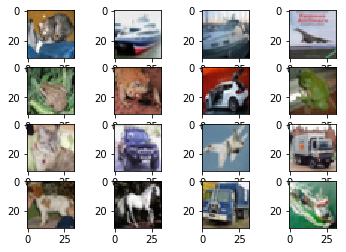

In [6]:
# Display first 16 images
show_images(X_test[:16])

In [0]:
# set up image augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
    )
datagen.fit(X_train)

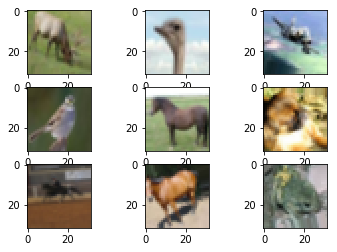

In [0]:
# see example augmentation images

import numpy as np
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [0]:
# Intialize variables
num_classes = 10
max_pixel_value = 255
kernel_size = (3, 3)
input_filters = 64

# Input shape is a tensor of image.
# CIFAR-10 has images of dimension (witdth * height * channels[Red, Green, Blue]) as 32 x 32 x 3
input_shape = (32, 32, 3) 

batch_size = 32
epochs = 10

In [11]:
# STEP 3: Prepare Data

from keras.utils import np_utils
import numpy as np

# Converting unsigned integers to 32-bit float precision
# so that it can be better utilized during normalization such as diving by max pixel value of 255
X_train = X_train.astype(np.float32)
X_test =  X_test.astype(np.float32)

# Normalization of pixel values (to [0-1] range)
X_train /= max_pixel_value
X_test /= max_pixel_value

# Convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [12]:
print(X_train.shape, "X_train")
print(X_test.shape, "X_test")
print(y_train.shape,"y_train")
print(y_test.shape, "y_train")

(50000, 32, 32, 3) X_train
(10000, 32, 32, 3) X_test
(50000, 10) y_train
(10000, 10) y_train


In [13]:
print('X_train[0] :\n', X_train[0])
print('\n')
print('y_train[0] :\n', y_train[0:1][0])

X_train[0] :
 [[[0.23137255 0.24313726 0.24705882]
  [0.16862746 0.18039216 0.1764706 ]
  [0.19607843 0.1882353  0.16862746]
  ...
  [0.61960787 0.5176471  0.42352942]
  [0.59607846 0.49019608 0.4       ]
  [0.5803922  0.4862745  0.40392157]]

 [[0.0627451  0.07843138 0.07843138]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509805 0.21568628]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117648 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215687 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941177 0.19607843]
  [0.47058824 0.32941177 0.19607843]
  [0.42745098 0.28627452 0.16470589]]

 ...

 [[0.8156863  0.6666667  0.3764706 ]
  [0.7882353  0.6        0.13333334]
  [0.7764706  0.6313726  0.10196079]
  ...
  [0.627451   0.52156866 0.27450982]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333334 0.07843138]]

 [[0.7058824  0.54509807 0.3764706 ]
  [0.6784314  0.4823529

In [0]:
# Denset function
# Note: Start with 64 filters 
# In dense block the 1 x 1 has 4 * filters and we concatenate input with output tensor
# In transition reduce channels to half of the existing

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, BatchNormalization, ReLU
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, Dense, Dropout, concatenate

def densenet(input_shape, n_classes, f = 32, dropout=0.0):

    def bn_relu_conv(x, f, k=1, s=1):
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(f, k, strides = s, padding = 'same')(x)
        return x
    
    def dense_block(x, r):
        for _ in range(r):
            temp = bn_relu_conv(x, 4 * f)
            temp = bn_relu_conv(temp, f, 3)
            if(dropout > 0.0):
              temp = Dropout(dropout)(temp)
            x = concatenate([temp, x])
        return x
            
            
    def transition_layer(x):
        x = bn_relu_conv(x, tf.keras.backend.int_shape(x)[-1] // 2)
        if(dropout > 0.0):
          x = Dropout(dropout)(x)
        x = AvgPool2D(2, strides=2, padding='same')(x)
        return x
    
    input = Input(input_shape)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)

    for r in [6, 12, 24, 16]:
        d = dense_block(x, r)
        x = transition_layer(d)
    
    x = GlobalAveragePooling2D()(d)
    output = Dense(n_classes, activation = 'softmax')(x)
    
    model = Model(input, output)
    return model

In [0]:
# Create Model - Densenet 121
model = densenet(input_shape, num_classes)

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 8, 8, 64)     0           conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 8, 8, 64)     256         max_pooling2d[0][0]              
_____________

In [0]:
# STEP 5: Compile Model : Configures model for training

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print('lr: ', tf.keras.backend.eval(model.optimizer.lr))

lr:  0.001


In [0]:
# STEP 6: Train/Fit Model

history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(X_test, y_test),
              callbacks=[tensorboard_callback])

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 298s 6ms/sample - loss: 1.5719 - acc: 0.4482 - val_loss: 1.5433 - val_acc: 0.4705
Epoch 2/10
50000/50000 [==============================] - 272s 5ms/sample - loss: 1.0925 - acc: 0.6136 - val_loss: 1.3127 - val_acc: 0.5574
Epoch 3/10
50000/50000 [==============================] - 270s 5ms/sample - loss: 0.8773 - acc: 0.6917 - val_loss: 1.2564 - val_acc: 0.5812
Epoch 4/10
50000/50000 [==============================] - 271s 5ms/sample - loss: 0.7515 - acc: 0.7384 - val_loss: 0.9129 - val_acc: 0.6836
Epoch 5/10
50000/50000 [==============================] - 271s 5ms/sample - loss: 0.6441 - acc: 0.7761 - val_loss: 1.0399 - val_acc: 0.6746
Epoch 6/10
50000/50000 [==============================] - 270s 5ms/sample - loss: 0.5509 - acc: 0.8097 - val_loss: 1.3550 - val_acc: 0.6018
Epoch 7/10
50000/50000 [==============================] - 271s 5ms/sample - loss: 0.4864 - acc: 0.8310 - val_l

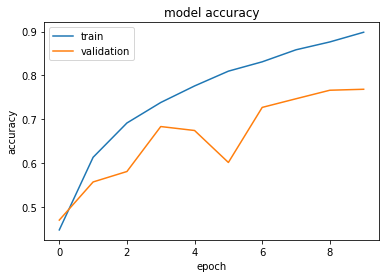

In [0]:
# Plot Accuracy
plotAccuracy(history)

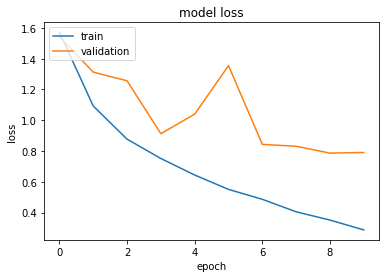

In [0]:
# Plot Losses
plotLosses(history)

## Analysis
- Model is overfitting
- Val_loss declined till epoch 4 and after that started to increase leading to overfitting.
- Val_acc started to decline after epoch 4
- Difference between train and val acc/loss is huge
- Val accuracy : 76.85%
- lr is 0.001(default)

## Improvement 1: 
- Increase Epochs from 10 to 20

In [0]:
# STEP 5: Compile Model : Configures model for training

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print('lr: ', tf.keras.backend.eval(model.optimizer.lr))

lr:  0.001


In [0]:
# STEP 6: Train/Fit Model

history = model.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=20,
              validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 299s 6ms/sample - loss: 0.2481 - acc: 0.9122 - val_loss: 0.8305 - val_acc: 0.7607
Epoch 2/20
50000/50000 [==============================] - 278s 6ms/sample - loss: 0.2040 - acc: 0.9275 - val_loss: 0.8235 - val_acc: 0.7750
Epoch 3/20
50000/50000 [==============================] - 277s 6ms/sample - loss: 0.1741 - acc: 0.9388 - val_loss: 0.9672 - val_acc: 0.7544
Epoch 4/20
50000/50000 [==============================] - 277s 6ms/sample - loss: 0.1513 - acc: 0.9472 - val_loss: 0.9853 - val_acc: 0.7578
Epoch 5/20
50000/50000 [==============================] - 277s 6ms/sample - loss: 0.1361 - acc: 0.9515 - val_loss: 0.9982 - val_acc: 0.7690
Epoch 6/20
50000/50000 [==============================] - 278s 6ms/sample - loss: 0.1277 - acc: 0.9556 - val_loss: 0.9132 - val_acc: 0.7832
Epoch 7/20
50000/50000 [==============================] - 277s 6ms/sample - loss: 0.1142 - acc: 0.9607 - val_l

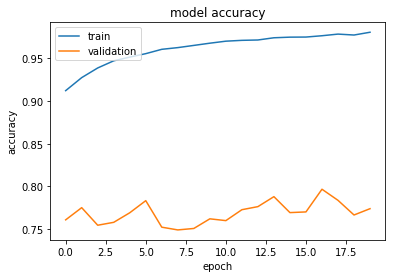

In [0]:
# Plot Accuracy
plotAccuracy(history)

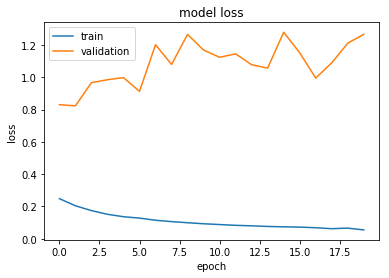

In [0]:
# Plot Losses
plotLosses(history)

#### Analysis

- Accuracy improved by 1%
- Model is overfitting 
- Big gap between train and validation loss/accuracy

### Improvement 2:
- Increase Batch size from 32 to 512 
- No of epochs : 20

In [0]:
# Create Model - Densenet 121
model = densenet(input_shape, num_classes)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_121 (Conv2D)             (None, 16, 16, 64)   9472        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 8, 8, 64)     0           conv2d_121[0][0]                 
__________________________________________________________________________________________________
batch_normalization_120 (BatchN (None, 8, 8, 64)     256         max_pooling2d_1[0][0]            
____________________________________________________________________________________________

In [0]:
# STEP 5: Compile Model : Configures model for training

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print('lr: ', tf.keras.backend.eval(model.optimizer.lr))

lr:  0.001


In [0]:
# STEP 6: Train/Fit Model

history = model.fit(X_train, y_train,
              batch_size=512,
              epochs=20,
              validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 106s 2ms/sample - loss: 1.5904 - acc: 0.4454 - val_loss: 2.3012 - val_acc: 0.1955
Epoch 2/20
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.1068 - acc: 0.6033 - val_loss: 2.4836 - val_acc: 0.2645
Epoch 3/20
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.9004 - acc: 0.6804 - val_loss: 1.4240 - val_acc: 0.5052
Epoch 4/20
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.7431 - acc: 0.7384 - val_loss: 1.4199 - val_acc: 0.5472
Epoch 5/20
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.6154 - acc: 0.7817 - val_loss: 1.0304 - val_acc: 0.6571
Epoch 6/20
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.5178 - acc: 0.8188 - val_loss: 1.1719 - val_acc: 0.6297
Epoch 7/20
50000/50000 [==============================] - 64s 1ms/sample - loss: 0.4427 - acc: 0.8435 - val_loss: 1

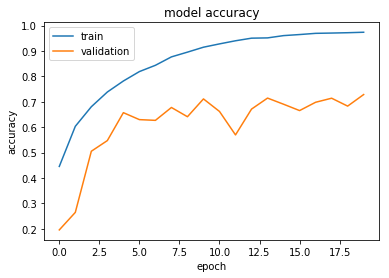

In [0]:
# Plot Accuracy
plotAccuracy(history)

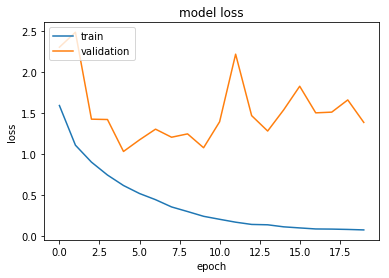

In [0]:
# Plot Losses
plotLosses(history)

### Analysis

- Curve is better, lines are closer
- Accuracy dropped to 72.84%
- Still overfitting

In [0]:
#

## Improvement 3:
- Reduce lr from 0.001 to 0.0001
- Batch size : 64
- Epochs : 25

In [0]:
# Create Model - Densenet 121
model = densenet(input_shape, num_classes)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_121 (Conv2D)             (None, 16, 16, 64)   9472        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 8, 8, 64)     0           conv2d_121[0][0]                 
__________________________________________________________________________________________________
batch_normalization_120 (BatchN (None, 8, 8, 64)     256         max_pooling2d_1[0][0]            
____________________________________________________________________________________________

In [0]:
# STEP 5: Compile Model : Configures model for training
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

print('lr: ', tf.keras.backend.eval(model.optimizer.lr))

lr:  1e-04


In [0]:
# STEP 6: Train/Fit Model

history = model.fit(X_train, y_train,
              batch_size=64,
              epochs=25,
              validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
 9856/50000 [====>.........................] - ETA: 16:26 - loss: 1.8500 - acc: 0.3260Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 1236s 25ms/sample - loss: 1.5477 - acc: 0.4359 - val_loss: 1.4297 - val_acc: 0.4712
Epoch 2/25
Epoch 2/25
50000/50000 [==============================] - 1221s 24ms/sample - loss: 1.2212 - acc: 0.5618 - val_loss: 1.3193 - val_acc: 0.5224
Epoch 3/25
Epoch 3/25
50000/50000 [==============================] - 1252s 25ms/sample - loss: 1.0361 - acc: 0.6297 - val_loss: 1.1943 - val_acc: 0.5808
Epoch 4/25
Epoch 4/25
50000/50000 [==============================] - 1214s 24ms/sample - loss: 0.8935 - acc: 0.6821 - val_loss: 1.1571 - val_acc: 0.5911
Epoch 5/25
Epoch 5/25
50000/50000 [==============================] - 1213s 24ms/sample - loss: 0.7600 - acc: 0.7293 - val_loss: 1.2929 - val_acc: 0.5777
Epoch 6/25
Epoch 6/25
50000/50000 [==============

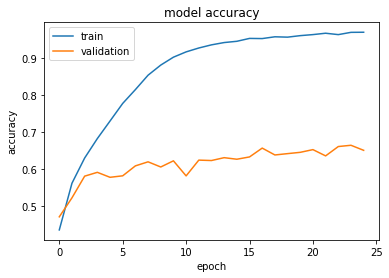

In [0]:
# Plot Accuracy
plotAccuracy(history)

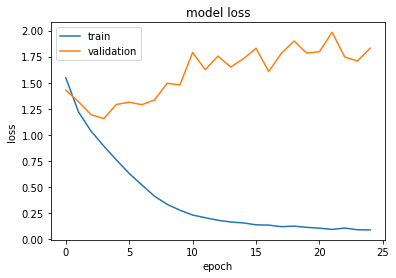

In [0]:
# Plot Losses
plotLosses(history)

#### Analysis
- OVerfitting is still there
- Reducing LR didn't help much
- Val accuracy reduced by 7%
- Training for 25 epochs also didn't help


### Improvement 4
- Data is less (60000), introduce data augmentation
   - Rotation : 15
   - Horizontal flip
   - Width and Height shift range : 0.1
- Reset Batch size to 32
- Reset lr to 0.001(default)
- Reset epcohs to 10


Image Augmentation setup is already done in the initial cells

In [0]:
# Create Model - Densenet 121
model = densenet(input_shape, num_classes)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_121 (Conv2D)             (None, 16, 16, 64)   9472        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 8, 8, 64)     0           conv2d_121[0][0]                 
__________________________________________________________________________________________________
batch_normalization_120 (BatchN (None, 8, 8, 64)     256         max_pooling2d_1[0][0]            
____________________________________________________________________________________________

In [0]:
# STEP 5: Compile Model : Configures model for training

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print('lr: ', tf.keras.backend.eval(model.optimizer.lr))

lr:  0.001


In [0]:
# Train with image augmentation
history2 = model.fit_generator(
                        datagen.flow(
                            X_train,
                            y_train,
                            batch_size=batch_size),
                            steps_per_epoch = len(X_train) / batch_size,
                            epochs=epochs, 
                            validation_data=(X_test, y_test))

Epoch 1/10
1563/1562 [==============================] - 1319s 844ms/step - loss: 1.6672 - acc: 0.4141 - val_loss: 2.0235 - val_acc: 0.3596
Epoch 2/10
1563/1562 [==============================] - 1301s 833ms/step - loss: 1.2475 - acc: 0.5540 - val_loss: 1.8057 - val_acc: 0.4539
Epoch 3/10
1563/1562 [==============================] - 1291s 826ms/step - loss: 1.0565 - acc: 0.6282 - val_loss: 1.1913 - val_acc: 0.5759
Epoch 4/10
1563/1562 [==============================] - 1306s 835ms/step - loss: 0.9347 - acc: 0.6713 - val_loss: 1.8360 - val_acc: 0.4591
Epoch 5/10
1563/1562 [==============================] - 1306s 836ms/step - loss: 0.8480 - acc: 0.7053 - val_loss: 1.6185 - val_acc: 0.5517
Epoch 6/10
1563/1562 [==============================] - 1447s 926ms/step - loss: 0.7817 - acc: 0.7276 - val_loss: 0.9432 - val_acc: 0.6786
Epoch 7/10
1563/1562 [==============================] - 1318s 843ms/step - loss: 0.7244 - acc: 0.7474 - val_loss: 1.0391 - val_acc: 0.6643
Epoch 8/10
1563/1562 [=====

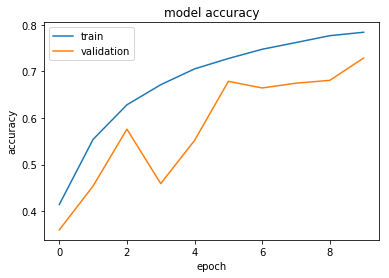

In [0]:
# Plot Accuracy
plotAccuracy(history2)

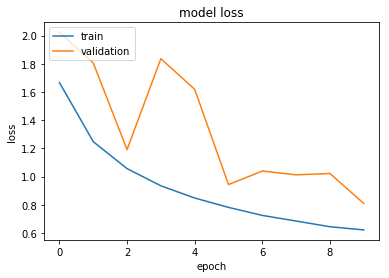

In [0]:
# Plot Losses
plotLosses(history2)

#### Analysis
- Accuracy improved by 7% to 72.86%
- Training and Validation curves are converging and its underfitting
- Need to train for more epochs so that curves and merge


### Improvement 5:
- Apply l2 regularization


In [0]:
# Custom Denset function - With l2 regularization
# Note: Start with 64 filters 
# In dense block the 1 x 1 has 4 * filters and we concatenate input with output tensor
# In transition reduce channels to half of the existing

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, BatchNormalization, ReLU
from tensorflow.keras.layers import Conv2D, AvgPool2D, MaxPool2D, GlobalAveragePooling2D, Dense, concatenate

from keras.regularizers import l2
reg=l2(1e-4)   # L2 or "ridge" regularisation

def densenet_l2(input_shape, n_classes, f = 32):

    def bn_relu_conv(x, f, k=1, s=1):
        x = BatchNormalization()(x)
        x = ReLU()(x)
        x = Conv2D(f, k, strides = s, padding = 'same', kernel_regularizer=reg)(x)
        return x
    
    def dense_block(x, r):
        for _ in range(r):
            y = bn_relu_conv(x, 4 * f)
            y = bn_relu_conv(y, f, 3)
            x = concatenate([y, x])
        return x
            
            
    def transition_layer(x):
        x = bn_relu_conv(x, tf.keras.backend.int_shape(x)[-1] // 2)
        x = AvgPool2D(2, strides=2, padding='same')(x)
        return x
    
    input = Input(input_shape)
    x = Conv2D(64, 7, strides = 2, padding = 'same')(input)
    x = MaxPool2D(3, strides = 2, padding = 'same')(x)

    for r in [6, 12, 24, 16]:
        d = dense_block(x, r)
        x = transition_layer(d)
    
    x = GlobalAveragePooling2D()(d)
    output = Dense(n_classes, activation = 'softmax')(x)
    
    model = Model(input, output)
    return model

In [0]:
# Create Model - custom densenet with l2
model = densenet_l2(input_shape, num_classes)

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 8, 8, 64)     0           conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 8, 8, 64)     256         max_pooling2d[0][0]              
_____________

In [0]:
# STEP 5: Compile Model : Configures model for training

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print('lr: ', tf.keras.backend.eval(model.optimizer.lr))

lr:  0.001


In [0]:
# Train with image augmentation
history_l2 = model.fit_generator(
                        datagen.flow(
                            X_train,
                            y_train,
                            batch_size=batch_size),
                            steps_per_epoch = len(X_train) / batch_size,
                            epochs=epochs, 
                            validation_data=(X_test, y_test))

Epoch 1/10
1563/1562 [==============================] - 300s 192ms/step - loss: 2.6711 - acc: 0.3975 - val_loss: 1.9971 - val_acc: 0.4574
Epoch 2/10
1563/1562 [==============================] - 255s 163ms/step - loss: 1.6465 - acc: 0.5361 - val_loss: 1.6558 - val_acc: 0.5019
Epoch 3/10
1563/1562 [==============================] - 255s 163ms/step - loss: 1.3404 - acc: 0.6085 - val_loss: 1.5474 - val_acc: 0.5577
Epoch 4/10
1563/1562 [==============================] - 269s 172ms/step - loss: 1.2148 - acc: 0.6529 - val_loss: 5.7428 - val_acc: 0.4161
Epoch 5/10
1563/1562 [==============================] - 262s 168ms/step - loss: 1.1404 - acc: 0.6808 - val_loss: 1.3062 - val_acc: 0.6359
Epoch 6/10
1563/1562 [==============================] - 255s 163ms/step - loss: 1.0832 - acc: 0.7029 - val_loss: 1.6046 - val_acc: 0.5547
Epoch 7/10
1563/1562 [==============================] - 280s 179ms/step - loss: 1.0307 - acc: 0.7194 - val_loss: 1.2388 - val_acc: 0.6668
Epoch 8/10
1563/1562 [============

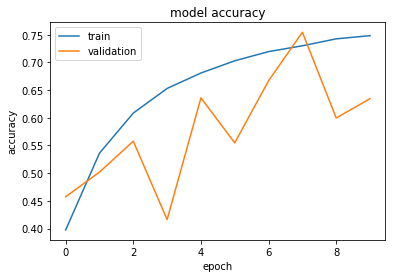

In [0]:
# Plot Accuracy
plotAccuracy(history_l2)

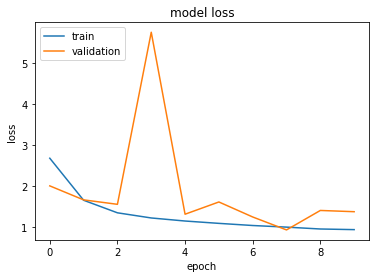

In [0]:
# Plot Losses
plotLosses(history_l2)

#### Analysis
- Model is undeterministic
- Overfitting as well underfitting
- High Peaks
- Val accuracy reduced to 63.45% with a peak of 75.44%
- Might have to reduce learning rate

### Improvement 6: 
- Remove l2 regularization
- Reduce lr from 0.001 to 0.0001
- Increase epochs from 10 to 50

In [0]:
# Create Model - Densenet 121
model = densenet(input_shape, num_classes)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_121 (Conv2D)             (None, 16, 16, 64)   9472        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 8, 8, 64)     0           conv2d_121[0][0]                 
__________________________________________________________________________________________________
batch_normalization_120 (BatchN (None, 8, 8, 64)     256         max_pooling2d_1[0][0]            
____________________________________________________________________________________________

In [0]:
# STEP 5: Compile Model : Configures model for training
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

print('lr: ', tf.keras.backend.eval(model.optimizer.lr))

lr:  1e-04


In [0]:
# Train with image augmentation
history_lr = model.fit_generator(
                        datagen.flow(
                            X_train,
                            y_train,
                            batch_size=batch_size),
                            steps_per_epoch = len(X_train) / batch_size,
                            epochs=50, 
                            validation_data=(X_test, y_test))

Epoch 1/50
1563/1562 [==============================] - 266s 170ms/step - loss: 0.3023 - acc: 0.8925 - val_loss: 0.7162 - val_acc: 0.7865
Epoch 2/50
1563/1562 [==============================] - 259s 166ms/step - loss: 0.2964 - acc: 0.8943 - val_loss: 0.7691 - val_acc: 0.7821
Epoch 3/50
1563/1562 [==============================] - 266s 170ms/step - loss: 0.2861 - acc: 0.8985 - val_loss: 0.6476 - val_acc: 0.8063
Epoch 4/50
1563/1562 [==============================] - 271s 174ms/step - loss: 0.2818 - acc: 0.8998 - val_loss: 0.7761 - val_acc: 0.7858
Epoch 5/50
1563/1562 [==============================] - 267s 171ms/step - loss: 0.2769 - acc: 0.9010 - val_loss: 0.7302 - val_acc: 0.7898
Epoch 6/50
1563/1562 [==============================] - 273s 175ms/step - loss: 0.2773 - acc: 0.9010 - val_loss: 0.7234 - val_acc: 0.7964
Epoch 7/50
1563/1562 [==============================] - 275s 176ms/step - loss: 0.2628 - acc: 0.9056 - val_loss: 0.6284 - val_acc: 0.8124
Epoch 8/50
1563/1562 [============

#### Analysis
- Due to disconnectio, had to interrupt
- Best accuracy was 82.47%
- Need to tran more 

## Improvement 7:
- Last + Increase epochs to 100

In [0]:
# Create Model - Densenet 121
model = densenet(input_shape, num_classes)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_242 (Conv2D)             (None, 16, 16, 64)   9472        input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 8, 8, 64)     0           conv2d_242[0][0]                 
__________________________________________________________________________________________________
batch_normalization_240 (BatchN (None, 8, 8, 64)     256         max_pooling2d_2[0][0]            
____________________________________________________________________________________________

In [0]:
# STEP 5: Compile Model : Configures model for training
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

print('lr: ', tf.keras.backend.eval(model.optimizer.lr))

lr:  1e-04


In [0]:
# Train with image augmentation
history_lr_100 = model.fit_generator(
                        datagen.flow(
                            X_train,
                            y_train,
                            batch_size=batch_size),
                            steps_per_epoch = len(X_train) / batch_size,
                            epochs=100, 
                            validation_data=(X_test, y_test))

Epoch 1/100
1563/1562 [==============================] - 322s 206ms/step - loss: 1.6135 - acc: 0.4094 - val_loss: 1.7069 - val_acc: 0.4004
Epoch 2/100
1563/1562 [==============================] - 276s 177ms/step - loss: 1.3508 - acc: 0.5136 - val_loss: 1.3725 - val_acc: 0.5101
Epoch 3/100
1563/1562 [==============================] - 266s 170ms/step - loss: 1.2142 - acc: 0.5673 - val_loss: 1.3429 - val_acc: 0.5379
Epoch 4/100
1563/1562 [==============================] - 279s 178ms/step - loss: 1.1105 - acc: 0.6062 - val_loss: 1.1630 - val_acc: 0.5919
Epoch 5/100
1563/1562 [==============================] - 283s 181ms/step - loss: 1.0367 - acc: 0.6320 - val_loss: 1.0522 - val_acc: 0.6335
Epoch 6/100
1563/1562 [==============================] - 279s 179ms/step - loss: 0.9676 - acc: 0.6534 - val_loss: 1.1331 - val_acc: 0.6090
Epoch 7/100
1563/1562 [==============================] - 282s 181ms/step - loss: 0.9128 - acc: 0.6766 - val_loss: 1.1171 - val_acc: 0.6316
Epoch 8/100
1563/1562 [====

#### Analysis
- Best accuracy : 82.81%
- Accruacy is almost constant after certain no of epochs.
- Need to have some other method to improve accuracy

## Improvement 8:
- Add dropout of 0.2
- No l2
- lr = 0.0001
- No of epochs 20

In [0]:
# Create Model - Densenet 121
model = densenet(input_shape, num_classes,dropout=0.2)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 16, 16, 64)   9472        input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)  (None, 8, 8, 64)     0           conv2d_2[0][0]                   
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 8, 8, 64)     256         max_pooling2d_1[0][0]            
______________________________________________________________________________________________

In [0]:
# STEP 5: Compile Model : Configures model for training
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

print('lr: ', tf.keras.backend.eval(model.optimizer.lr))

lr:  1e-04


In [0]:
# Train with image augmentation
history_dropout = model.fit_generator(
                        datagen.flow(
                            X_train,
                            y_train,
                            batch_size=batch_size),
                            steps_per_epoch = len(X_train) / batch_size,
                            epochs=20, 
                            validation_data=(X_test, y_test))

Epoch 1/20
1563/1562 [==============================] - 310s 199ms/step - loss: 1.7268 - acc: 0.3630 - val_loss: 1.3986 - val_acc: 0.4884
Epoch 2/20
1563/1562 [==============================] - 267s 171ms/step - loss: 1.4472 - acc: 0.4739 - val_loss: 1.4280 - val_acc: 0.4930
Epoch 3/20
1563/1562 [==============================] - 271s 173ms/step - loss: 1.3078 - acc: 0.5285 - val_loss: 1.9049 - val_acc: 0.4285
Epoch 4/20
1563/1562 [==============================] - 281s 180ms/step - loss: 1.2064 - acc: 0.5669 - val_loss: 1.2762 - val_acc: 0.5785
Epoch 5/20
1563/1562 [==============================] - 279s 179ms/step - loss: 1.1271 - acc: 0.5991 - val_loss: 1.1772 - val_acc: 0.6096
Epoch 6/20
1563/1562 [==============================] - 282s 180ms/step - loss: 1.0620 - acc: 0.6231 - val_loss: 1.2048 - val_acc: 0.6024
Epoch 7/20
1563/1562 [==============================] - 265s 170ms/step - loss: 1.0097 - acc: 0.6413 - val_loss: 1.2353 - val_acc: 0.6096
Epoch 8/20
1563/1562 [============

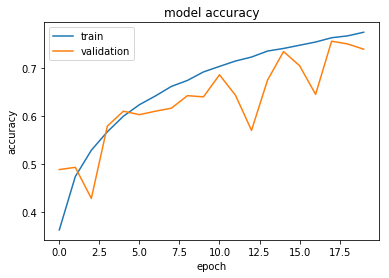

In [0]:
plotAccuracy(history_dropout)

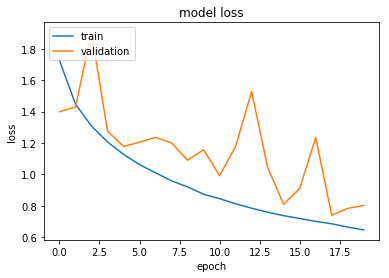

In [0]:
plotLosses(history_dropout)

#### Analysis
- Best Accuracy 75.50%
- Model is overfitting
- Dropout applied only at dense block and not at the transition block

## Improvement 9:
- Add dropout of 0.2 to dense and transition layer
- No l2
- lr = 0.0001
- No of epochs 20

In [0]:
# Create Model - Densenet 121
model = densenet(input_shape, num_classes,dropout=0.2)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_123 (Conv2D)             (None, 16, 16, 64)   9472        input_3[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 8, 8, 64)     0           conv2d_123[0][0]                 
__________________________________________________________________________________________________
batch_normalization_121 (BatchN (None, 8, 8, 64)     256         max_pooling2d_2[0][0]            
____________________________________________________________________________________________

In [0]:
# STEP 5: Compile Model : Configures model for training
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

print('lr: ', tf.keras.backend.eval(model.optimizer.lr))

lr:  1e-04


In [0]:
# Train with image augmentation
history_dropout = model.fit_generator(
                        datagen.flow(
                            X_train,
                            y_train,
                            batch_size=batch_size),
                            steps_per_epoch = len(X_train) / batch_size,
                            epochs=20, 
                            validation_data=(X_test, y_test))

Epoch 1/20
1563/1562 [==============================] - 339s 217ms/step - loss: 1.8021 - acc: 0.3334 - val_loss: 1.7517 - val_acc: 0.3933
Epoch 2/20
1563/1562 [==============================] - 286s 183ms/step - loss: 1.5384 - acc: 0.4352 - val_loss: 1.4566 - val_acc: 0.4951
Epoch 3/20
1563/1562 [==============================] - 284s 182ms/step - loss: 1.3975 - acc: 0.4926 - val_loss: 1.5037 - val_acc: 0.4953
Epoch 4/20
1563/1562 [==============================] - 283s 181ms/step - loss: 1.2921 - acc: 0.5328 - val_loss: 1.6067 - val_acc: 0.4726
Epoch 5/20
1563/1562 [==============================] - 286s 183ms/step - loss: 1.2085 - acc: 0.5664 - val_loss: 1.4912 - val_acc: 0.5051
Epoch 6/20
1563/1562 [==============================] - 286s 183ms/step - loss: 1.1320 - acc: 0.5951 - val_loss: 1.4750 - val_acc: 0.5332
Epoch 7/20
1563/1562 [==============================] - 286s 183ms/step - loss: 1.0754 - acc: 0.6170 - val_loss: 1.1700 - val_acc: 0.6197
Epoch 8/20
1563/1562 [============

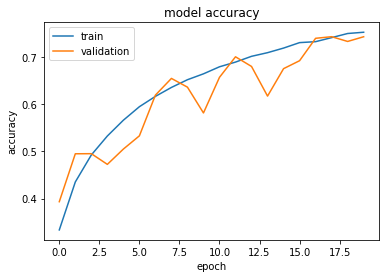

In [0]:
plotAccuracy(history_dropout)

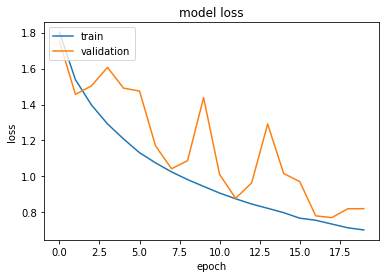

In [0]:
plotLosses(history_dropout)

#### Analysis
- validation curve is zig zag meaning its overfitting
- Best accuracy 74.07% 

## Improvement 10:
- Add more data with augmentation 
  - Rotation : 15
  - width and height shift : 5/.32
- [P] No l2
- [P] lr = 0.0001
- [P] No of epochs 20

In [0]:
# set up image augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=5/.32,
    height_shift_range=5/.32
    )
datagen.fit(X_train)

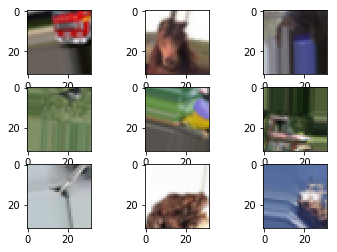

In [0]:
# see example augmentation images

import numpy as np
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [0]:
# Create Model - Densenet 121
model = densenet(input_shape, num_classes,dropout=0.2)

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_244 (Conv2D)             (None, 16, 16, 64)   9472        input_4[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_3 (MaxPooling2D)  (None, 8, 8, 64)     0           conv2d_244[0][0]                 
__________________________________________________________________________________________________
batch_normalization_241 (BatchN (None, 8, 8, 64)     256         max_pooling2d_3[0][0]            
____________________________________________________________________________________________

In [0]:
# STEP 5: Compile Model : Configures model for training
from tensorflow.keras.optimizers import Adam

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['accuracy'])

print('lr: ', tf.keras.backend.eval(model.optimizer.lr))

lr:  1e-04


In [0]:
# Train with image augmentation
history_augmentation = model.fit_generator(
                        datagen.flow(
                            X_train,
                            y_train,
                            batch_size=batch_size),
                            steps_per_epoch = len(X_train) / batch_size,
                            epochs=20, 
                            validation_data=(X_test, y_test))

Epoch 1/20
1563/1562 [==============================] - 355s 227ms/step - loss: 2.0165 - acc: 0.2546 - val_loss: 1.9299 - val_acc: 0.3119
Epoch 2/20
1563/1562 [==============================] - 297s 190ms/step - loss: 1.8361 - acc: 0.3222 - val_loss: 2.1300 - val_acc: 0.3531
Epoch 3/20
1563/1562 [==============================] - 296s 190ms/step - loss: 1.7252 - acc: 0.3628 - val_loss: 2.2217 - val_acc: 0.3478
Epoch 4/20
1563/1562 [==============================] - 295s 189ms/step - loss: 1.6400 - acc: 0.4009 - val_loss: 1.5922 - val_acc: 0.4553
Epoch 5/20
1563/1562 [==============================] - 295s 189ms/step - loss: 1.5612 - acc: 0.4319 - val_loss: 1.5710 - val_acc: 0.4724
Epoch 6/20
1563/1562 [==============================] - 295s 189ms/step - loss: 1.4982 - acc: 0.4571 - val_loss: 2.2194 - val_acc: 0.4228
Epoch 7/20
1563/1562 [==============================] - 291s 186ms/step - loss: 1.4437 - acc: 0.4788 - val_loss: 1.3296 - val_acc: 0.5428
Epoch 8/20
1563/1562 [============

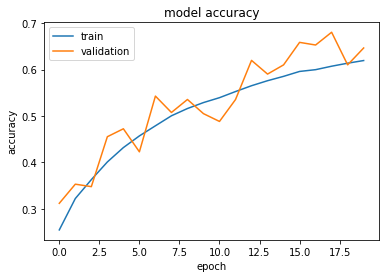

In [0]:
plotAccuracy(history_augmentation)

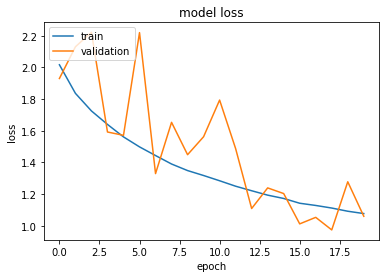

In [0]:
plotLosses(history_augmentation)

#### Analysis
- Not much change in curve, still very random
- Best val accuracy 65.85%

## Improvement 11: 
- Use ReduceLROnPlateau with a factor of 0.2 and min_0.001
- lr = 0.001(default)



In [0]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, Callback

lr_reducer = ReduceLROnPlateau(monitor='val_acc', factor=0.2, cooldown=0, patience=5, min_lr=0.0001)

callbacks = [lr_reducer]

In [0]:
# set up image augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=5/.32,
    height_shift_range=5/.32
    )
datagen.fit(X_train)

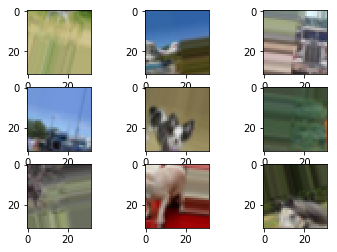

In [8]:
# see example augmentation images

import numpy as np
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype(np.uint8))
    plt.show()
    break

In [15]:
# Create Model - Densenet 121
model = densenet(input_shape, num_classes,dropout=0.2)

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 16, 16, 64)   9472        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 8, 8, 64)     0           conv2d[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 8, 8, 64)     256         max_pooling2d[0][0]              
_____________

In [19]:
# STEP 5: Compile Model : Configures model for training

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
print('lr: ', tf.keras.backend.eval(model.optimizer.lr))

lr:  0.001


In [20]:
# Train with image augmentation
history_augmentation = model.fit_generator(
                        datagen.flow(
                            X_train,
                            y_train,
                            batch_size=batch_size),
                            steps_per_epoch = len(X_train) / batch_size,
                            epochs=20, 
                            validation_data=(X_test, y_test),
                            callbacks=callbacks)

Epoch 1/20
10000/1562 [================================================================================================================================================================================================] - 22s 2ms/sample - loss: 1.9346 - acc: 0.3812


FailedPreconditionError: ignored